# Max Becker

## Research question/interests

I am interested in the ideal size of a hockey player. Whether it is the best size for scoring based off of the data present or the ideal size for a goalie, it will be interesting to discover the ideal size for different roles and allow people to compare themselves to this analysis.

In [46]:
#Step one of analysis Pipeline Loading data.
import pandas as pd
nhlData=pd.read_csv("../data/raw/NHL_Players_Statistics.csv", sep=";")
nhlData

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


In [71]:
# Step 2 of analysis Pipeline, Cleaning data by dropping columns I will not be using (anything not to do with player size and points) and removing missing data.
nhlSkaterSize_GoalsInitialClean=nhlData.drop(["Date_of_birth","TEAM","Place_of_birth","Saves","Save_Percentage","Shutouts","Goals_Against","Goals_Against_Average","Shots_Against",
                                   "Time_on_Ice_per_Game",'Games_Started','Number',"Overtime_Losses","Ties","PowerPlay_Goals","PowerPlay_Assists","Short_Goals",
                                    "Short_Assists","Game_Tying_Goals","SEASON","Game_Winning_Goals","Production","Wins","Losses","Experience","PlusMinus_Ratings", "Penalty_Minutes"],axis=1)
nhlSkaterSize_GoalsInitialClean

,Name,SEASON_year,Games_Played,Goals,Assists,Points,Shots_on_Goal,Shooting_Percentage,Position,Height,Weight,Body_mass_index,Age
0,Aaron Downey,2000,1,0.0,0.0,0.0,0.0,0.0,Right_wing,185,98,28.6,26
1,Aaron Downey,2001,3,0.0,0.0,0.0,2.0,0.0,Right_wing,185,98,28.6,27
2,Aaron Downey,2002,36,1.0,0.0,1.0,10.0,10.0,Right_wing,185,98,28.6,28
3,Aaron Downey,2003,43,1.0,1.0,2.0,14.0,7.1,Right_wing,185,98,28.6,29
4,Aaron Downey,2004,37,1.0,1.0,2.0,11.0,9.1,Right_wing,185,98,28.6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,2001,73,38.0,51.0,89.0,217.0,17.5,Right_wing,178,85,26.8,29
27315,Zigmund Palffy,2002,63,32.0,27.0,59.0,161.0,19.9,Right_wing,178,85,26.8,30
27316,Zigmund Palffy,2003,76,37.0,48.0,85.0,277.0,13.4,Right_wing,178,85,26.8,31
27317,Zigmund Palffy,2004,35,16.0,25.0,41.0,109.0,14.7,Right_wing,178,85,26.8,32


In [72]:
# Step 2 Cleaning Data this is also involved with Cleaning data by removing rows that are not relevant in my EDA (data from earlier than 2000).

nhlSkaterSize_GoalsInitialClean2000s = nhlSkaterSize_GoalsInitialClean.drop(nhlSkaterSize_GoalsInitialClean[nhlSkaterSize_GoalsInitialClean["SEASON_year"] < 2000].index)
nhlSkaterSize_GoalsInitialClean2000s

,Name,SEASON_year,Games_Played,Goals,Assists,Points,Shots_on_Goal,Shooting_Percentage,Position,Height,Weight,Body_mass_index,Age
0,Aaron Downey,2000,1,0.0,0.0,0.0,0.0,0.0,Right_wing,185,98,28.6,26
1,Aaron Downey,2001,3,0.0,0.0,0.0,2.0,0.0,Right_wing,185,98,28.6,27
2,Aaron Downey,2002,36,1.0,0.0,1.0,10.0,10.0,Right_wing,185,98,28.6,28
3,Aaron Downey,2003,43,1.0,1.0,2.0,14.0,7.1,Right_wing,185,98,28.6,29
4,Aaron Downey,2004,37,1.0,1.0,2.0,11.0,9.1,Right_wing,185,98,28.6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,2001,73,38.0,51.0,89.0,217.0,17.5,Right_wing,178,85,26.8,29
27315,Zigmund Palffy,2002,63,32.0,27.0,59.0,161.0,19.9,Right_wing,178,85,26.8,30
27316,Zigmund Palffy,2003,76,37.0,48.0,85.0,277.0,13.4,Right_wing,178,85,26.8,31
27317,Zigmund Palffy,2004,35,16.0,25.0,41.0,109.0,14.7,Right_wing,178,85,26.8,32


<AxesSubplot:>

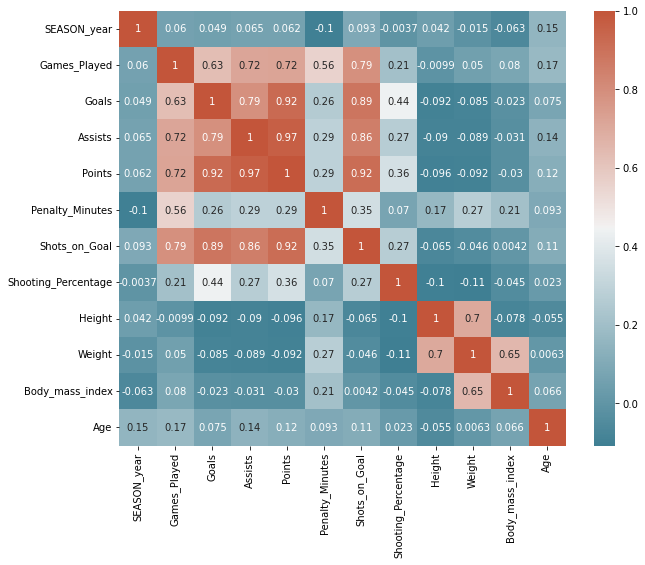

In [66]:
# Making a correlation matrix/ Heatmap for EDA to find general correlations between columns.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
corr = nhlSkaterSize_GoalsInitialClean2000s.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='Height', ylabel='Goals'>

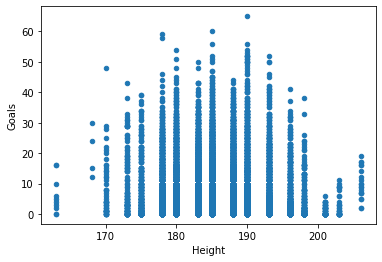

In [69]:
#Using a scatter plot for EDA of Height and Goals relationship, normal distribution with median around 185/186 cm.
nhlSkaterSize_GoalsInitialClean2000s.plot(kind='scatter', x='Height', y='Goals')

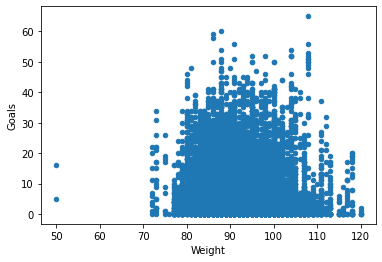

In [80]:
#Using another scatter plot for EDA of Weight and Goals relationship, negative skew median around 95kg.
nhlSkaterSize_GoalsInitialClean2000s.plot(kind='scatter', x='Weight', y='Goals')

<AxesSubplot:xlabel='Body_mass_index', ylabel='Goals'>

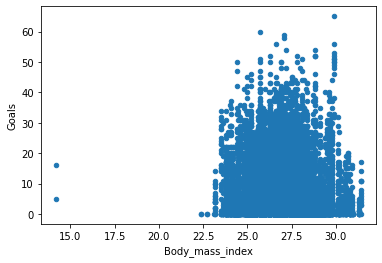

In [81]:
#Using a scatter plot to visualize the relationship between BMI and Goals, negativ skew with median around 27.4.
nhlSkaterSize_GoalsInitialClean2000s.plot(kind='scatter', x="Body_mass_index", y='Goals')